<a href="https://colab.research.google.com/github/MerkulovDaniil/optim/blob/master/assets/Notebooks/Nevergrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation
!pip install nevergrad

     |████████████████████████████████| 411 kB 7.0 MB/s 
     |████████████████████████████████| 269 kB 51.0 MB/s 
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=3e028f090a51ec42a27370f382235610f3db4807abbc5bbb3830f113e74f54ae
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [2]:
import nevergrad as ng
print(f'🤖 The list of optimizers in nevergrad library: \n{sorted(ng.optimizers.registry.keys())}')

🤖 The list of optimizers in nevergrad library: 
['ASCMADEthird', 'AdaptiveDiscreteOnePlusOne', 'AlmostRotationInvariantDE', 'AnisotropicAdaptiveDiscreteOnePlusOne', 'AvgMetaRecenteringNoHull', 'BO', 'BOSplit', 'BayesOptimBO', 'CM', 'CMA', 'CMandAS2', 'CMandAS3', 'CauchyLHSSearch', 'CauchyOnePlusOne', 'CauchyScrHammersleySearch', 'ChainCMAPowell', 'ChainDiagonalCMAPowell', 'ChainMetaModelPowell', 'ChainMetaModelSQP', 'ChainNaiveTBPSACMAPowell', 'ChainNaiveTBPSAPowell', 'Cobyla', 'DE', 'DiagonalCMA', 'DiscreteBSOOnePlusOne', 'DiscreteDoerrOnePlusOne', 'DiscreteLenglerOnePlusOne', 'DiscreteOnePlusOne', 'DoubleFastGADiscreteOnePlusOne', 'EDA', 'ES', 'FCMA', 'GeneticDE', 'HaltonSearch', 'HaltonSearchPlusMiddlePoint', 'HammersleySearch', 'HammersleySearchPlusMiddlePoint', 'HullAvgMetaRecentering', 'HullAvgMetaTuneRecentering', 'HyperOpt', 'LHSSearch', 'LargeHaltonSearch', 'LhsDE', 'MetaModel', 'MetaModelOnePlusOne', 'MetaRecentering', 'MetaTuneRecentering', 'MixES', 'MultiCMA', 'MultiDiscret

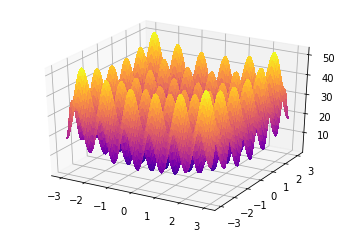

In [3]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.pyplot as plt
import numpy as np

def rastrigin(X):
    A = 10
    return A*len(X) + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in X])

if __name__ == '__main__':
    X = np.linspace(-3, 3, 100)    
    Y = np.linspace(-3, 3, 100)    

    X, Y = np.meshgrid(X, Y)

    Z = rastrigin([X, Y])

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma, linewidth=0, antialiased=False)    
    plt.savefig('rastrigin.png')

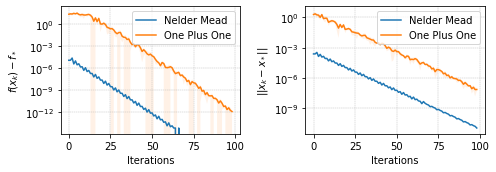

In [10]:
N_exp       = 5
max_iter    = 100


optimizer_names = ['Nelder Mead', 'One Plus One']
exp_fs = []
exp_ds = []

for optimizer_name in optimizer_names:
    fs_data     = np.zeros((N_exp, max_iter-1))
    dists_data  = np.zeros((N_exp, max_iter-1))
    for i_exp in range(N_exp):
        if optimizer_name == 'Nelder Mead':
            optimizer = ng.optimizers.NelderMead(parametrization=2,budget=max_iter)
        elif optimizer_name == 'Random':
            optimizer = ng.optimizers.RandomSearch(parametrization=2,budget=max_iter)
        elif optimizer_name == 'Differential evolution':
            optimizer = ng.optimizers.DE(parametrization=2,budget=max_iter)
        elif optimizer_name == 'One Plus One':
            optimizer = ng.optimizers.OnePlusOne(parametrization=2,budget=max_iter)
        fs = []
        dists = []
        def print_candidate_and_value(optimizer, candidate, value):
            fs.append(value)
            dists.append(np.linalg.norm(candidate.value))
        optimizer.register_callback("tell", print_candidate_and_value)
        optimizer.minimize(rastrigin)  # triggers a print at each tell within minimize
        fs_data[i_exp, :]       = fs[1:]
        dists_data[i_exp, :]    = dists[1:]

    exp_fs.append(fs_data)
    exp_ds.append(dists_data)


def plot_convergence(list_of_fs_data, list_of_labels, list_of_dists_data):
    fig,axes = plt.subplots(nrows =1, ncols =2, figsize =(7,2.5))
    for fs_data, label, dists_data in zip(list_of_fs_data, list_of_labels, list_of_dists_data):
        N_exp, max_iter = fs_data.shape
        mean    = np.zeros(max_iter)
        std     = np.zeros(max_iter)
       
        mean = fs_data.mean(axis = 0)
        std = fs_data.std(axis = 0)
        axes[0].semilogy(range(max_iter), mean, label = label)
        axes[0].fill_between(range(max_iter), mean-std, mean+std, alpha=0.1)
        axes[0].grid(True,which="both", linestyle='--', linewidth=0.4)
        axes[0].set_xlabel('Iterations')
        axes[0].set_ylabel(f'$f(x_k) - f_*$')
        axes[0].legend()

        mean = dists_data.mean(axis = 0)
        std = dists_data.std(axis = 0)
        axes[1].semilogy(range(max_iter), mean, label = label)
        axes[1].fill_between(range(max_iter), mean-std, mean+std, alpha=0.1)
        axes[1].grid(True,which="both", linestyle='--', linewidth=0.4)
        axes[1].set_xlabel('Iterations')
        axes[1].set_ylabel(f'$\||x_k - x_*\||$')
        axes[1].legend()
        
    fig.tight_layout()
    fig.show()

plot_convergence(exp_fs, optimizer_names, exp_ds)

In [ ]:
np.mean(exp_fs[1])

21.84189938586012